# Ajuste de funções não polinomiais

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

In [2]:
def SubRet(U, c):
    n = c.size
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (c[i] -U[i,i+1:]@x[i+1:])/U[i,i]
    return x

def ElimGauss(A, b):
    U = np.copy(A)
    c = np.copy(b)
    n = c.size
    for j in range(n-1):
        for i in range(j+1, n):
            m = U[i,j]/U[j,j]
            U[i,j:] -= m*U[j,j:]
            c[i] -= m*c[j]
    x = SubRet(U,c)
    return x

In [3]:
# Dados do problema:
x = np.arange(1.0, 8.0)
y = np.array([1., 3., 2., 4., 2., 5., 4.])

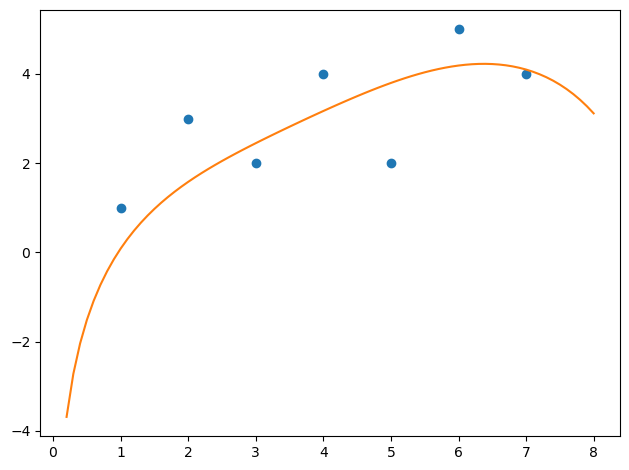

In [4]:
#construção da matriz A
k=len(x)
n=3# tamanho dos vetores parâmetros
A=np.zeros((k,n))
for i in range(k):
   A[i,0]=np.log(x[i])
   A[i,1]=np.cos(x[i])
   A[i,2]=np.exp(x[i])
m=ElimGauss(A.T@A,A.T@y)
plt.plot(x, y, "o")
# otendo os valores para função ajustada
x_novo=np.arange(0.2,8.1,0.1)
t=len(x_novo)
y_ajuste=np.zeros(t)
for i in range(t):
    y_ajuste[i]= m[0]*np.log(x_novo[i]) + m[1]*np.cos(x_novo[i]) + m[2]*np.exp(x_novo[i])
plt.plot(x_novo, y_ajuste)
plt.tight_layout()
plt.show()